## Лабораторная работа №1 | Вариант 6

Выполнил: Хереш Артемий Игоревич

### 1. Numpy

In [40]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [41]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [42]:
np.diag([1, 2, 3, 4], -1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [43]:
print(9, 10, sep='\n')

9
10


4. Как найти самое часто встречаемое значение между двумя массивами? 

In [44]:
arr1 = np.array([1, 2, 2, 3, 5])
arr2 = np.array([2, 3, 4])

combined = np.concatenate([arr1, arr2])

unique, counts = np.unique(combined, return_counts=True)

max_count = np.max(counts)

most_frequent = unique[counts == max_count]

print(most_frequent)

[2]


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [45]:
import warnings

warnings.filterwarnings('ignore')

In [46]:
np.seterr(all="ignore")


{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [47]:
def generator(n):
    for x in range(n, n + 10):
        yield x

np.fromiter((x for x in generator(10)), int)


array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [48]:
rng = np.random.default_rng()
rand_arr = rng.standard_normal(10)
print(rand_arr)
np.sort(rand_arr)


[ 0.08365282  1.43459494 -0.0553887  -0.44863322 -0.89959105  0.11326005
 -0.98253559 -0.48469054 -0.18747076  0.71342916]


array([-0.98253559, -0.89959105, -0.48469054, -0.44863322, -0.18747076,
       -0.0553887 ,  0.08365282,  0.11326005,  0.71342916,  1.43459494])

8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [49]:
rng = np.random.default_rng()
rand_arr = rng.standard_normal(20)
arr = rand_arr.reshape((10, 2))
print(arr)

for i, row in enumerate(arr):
    x, y = row
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    arr[i] = [r, theta]

arr

[[ 0.53495164  0.10984012]
 [ 0.53047159  1.3382338 ]
 [ 1.40239815 -0.72233269]
 [ 1.73558642  0.35521294]
 [-1.11590537  0.08440866]
 [-0.77150888 -0.53815585]
 [ 0.22333434  0.08872753]
 [-0.21785036 -0.14143654]
 [-0.36074891 -0.76522569]
 [-0.68931982 -0.99627619]]


array([[ 0.54611181,  0.20251258],
       [ 1.43953806,  1.19340001],
       [ 1.5774933 , -0.4756305 ],
       [ 1.77156328,  0.20187662],
       [ 1.11909321,  3.06609501],
       [ 0.94065811, -2.53252175],
       [ 0.24031397,  0.37816425],
       [ 0.25973655, -2.5657539 ],
       [ 0.84599653, -2.0113263 ],
       [ 1.21149827, -2.17606284]])

9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [50]:
pixel = np.dtype([("r", np.uint16),
                       ("g", np.uint16),
                       ("b", np.uint16),
                       ("x", np.uint16),
                       ("y", np.uint16)])
pixel

dtype([('r', '<u2'), ('g', '<u2'), ('b', '<u2'), ('x', '<u2'), ('y', '<u2')])

10. Как конвертировать тип массив от float32 в int32 in place?

In [51]:
arr = np.array([1.5, 2.7, 3.1, 4.9], dtype=np.float32)

arr.dtype = np.int32
arr

array([1069547520, 1076677837, 1078355558, 1084017869], dtype=int32)

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("student_perfomance.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [90]:
print(f'Среднее количество часов на сон = {df["Sleep_Hours"].mean()}')

Среднее количество часов на сон = 7.029060087785682


2. Сколько процентов студентов посещают внеклассовые активности?

In [3]:
percent = (df["Extracurricular_Activities"].value_counts()["Yes"] / df["Extracurricular_Activities"].count()) * 100
print(f'Процент студентов посещающих внеклассовые активности - {percent}%')

Процент студентов посещающих внеклассовые активности - 59.60345088542455%


3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [32]:
gender = df['Gender']
print("Девушки сдают экзамен лучше чем мужчины." if df[gender == 'Female']['Exam_Score'].mean() > df[gender == 'Male']['Exam_Score'].mean() else "Мужчины сдают экзамен лучше чем женщины.")  

Девушки сдают экзамен лучше чем мужчины.


4. Выведите 25 и 75 перцентили времени сна студентов

In [ ]:
sleep_hours = df["Sleep_Hours"]
q75 = sleep_hours.quantile(0.75)
q25 = sleep_hours.quantile(0.25)
print(f'25 перцентилиь времени сна = {q25}, 75 перцентилиь времени сна = {q75}.')

25 перцентилиь времени сна = 6.0, 75 перцентилиь времени сна = 8.0


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [ ]:
print("Те, кто спит больше сдают экзамены лучше." if df[sleep_hours >= q75]["Exam_Score"].mean() > df[sleep_hours <= q25]["Exam_Score"].mean() else "Те, кто спит меньше сдают экзамены лучше.")

Те кто спи меньше сдают экзамены лучше.


6. Влияет ли физическая активность на результаты экзамена?

In [13]:
phys_activity = df["Physical_Activity"]
print("Оценки за экзамен лучше у тех, кто не прогуливал физру." if df[phys_activity  > 3]["Exam_Score"].mean() >
       df[phys_activity  <= 3]["Exam_Score"].mean() else "У тех, кто прогуливал физру оценки не хуже чем у тех, кто не прогуливал")

Оценки за экзамен лучше у тех, кто не прогуливал физру.


7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [ ]:
education_level = df["Parental_Education_Level"]
print("Те у кого родители имеют высшее образование сдают экзамен лучше тех, у кого родители не имеют высшее образования." if df[education_level != "High School"]["Exam_Score"].mean() >
       df[education_level == "High School"]["Exam_Score"].mean() else "У тех студентов, чьи родители не имеют высшее образование сдавали не хуже тех студентов у кого родители имеют высшее образование.")

Те у кого родители имеют высшее образование сдают экзамен лучше тех, у кого родители не имеют высшее образования


8. Как влияет участие родителей на результаты экзаменов

In [17]:
parental_involment = df["Parental_Involvement"]
print("Участие родителей положительно влияет на результаты экзаменов." if df[parental_involment != 'Low']["Exam_Score"].mean() >
       df[parental_involment == 'Low']["Exam_Score"].mean() else "Неучастие родителей не влиет отрицательно на результаты экзаменов.")

Участие родителей положительно влияет на результаты экзаменов.


9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [21]:
family_income = df["Family_Income"]
print("В семьях с доходом больше среднего дети сдают экзамены лучше." if df[family_income == "High"]["Exam_Score"].mean() > 
      df[family_income != "High"]["Exam_Score"].mean() else "В семьях с доходом больше среднего дети сдают экзамены не лучше чем во всех остальных семьях.") 


В семьях с доходом больше среднего дети сдают экзамены лучше.


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [35]:
filtered = df[(df["Family_Income"] == "Low") & (df["Internet_Access"] == "No")]
count_good = len(filtered[filtered["Exam_Score"] > 70])
proportion = (count_good / len(df)) * 100
print(f"Доля студентов: {proportion}%")

Доля студентов: 0.2573028606023914%


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [19]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

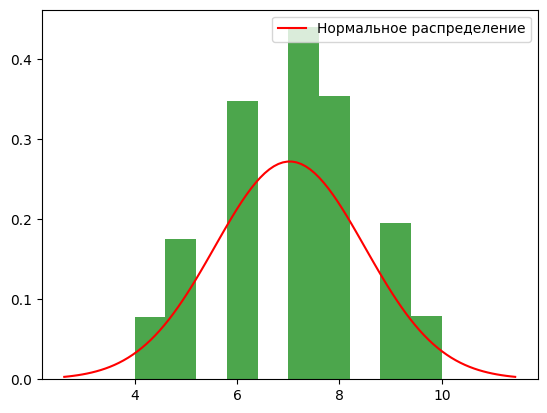

In [39]:
plt.hist(df['Sleep_Hours'], bins=10, density=True, alpha=0.7, color='g')
mu, sigma = df['Sleep_Hours'].mean(), df['Sleep_Hours'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label='Нормальное распределение')
plt.legend()

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

Text(0, 0.5, 'Частота')

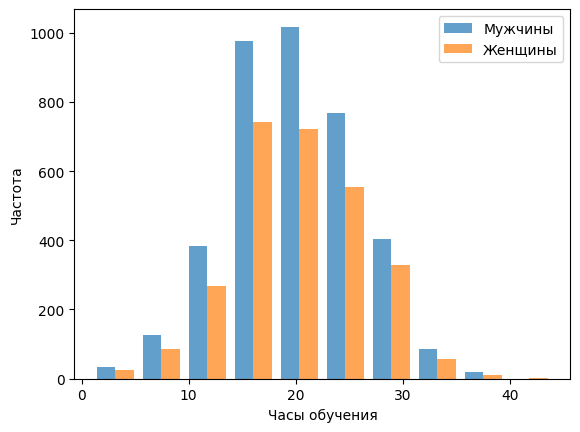

In [41]:
man_hours = df[df["Gender"] == "Male"]["Hours_Studied"]
female_hours = df[df["Gender"] == "Female"]["Hours_Studied"]

plt.hist([man_hours, female_hours], bins=10, label=['Мужчины', 'Женщины'], alpha=0.7)
plt.legend()
plt.xlabel('Часы обучения')
plt.ylabel('Частота')

3. Как зависит результат конечного экзамена от результата первого экзамена

Text(0.5, 1.0, 'Зависимость итогового экзамена от предыдущего')

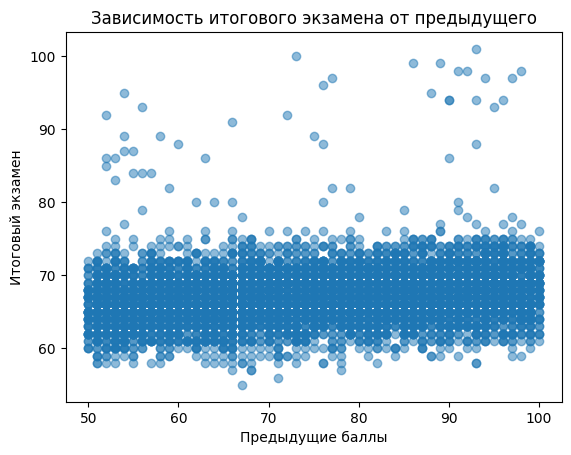

In [10]:
plt.scatter(df['Previous_Scores'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Предыдущие баллы')
plt.ylabel('Итоговый экзамен')
plt.title('Зависимость итогового экзамена от предыдущего')

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

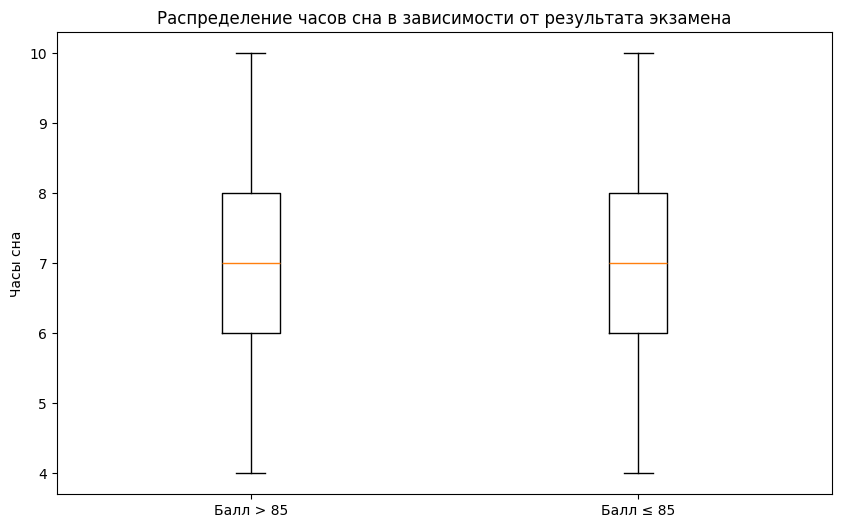

In [ ]:
plt.figure(figsize=(10, 6))
data = [df[df['Exam_Score'] > 85]['Sleep_Hours'], 
        df[df['Exam_Score'] <= 85]['Sleep_Hours']]
plt.boxplot(data, tick_labels=['Балл > 85', 'Балл ≤ 85'])
plt.title('Распределение часов сна в зависимости от результата экзамена')
plt.ylabel('Часы сна')
plt.show()

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

Коэффициент корреляции: 0.15652518539225324
Наблюдается слабая положительная корреляция


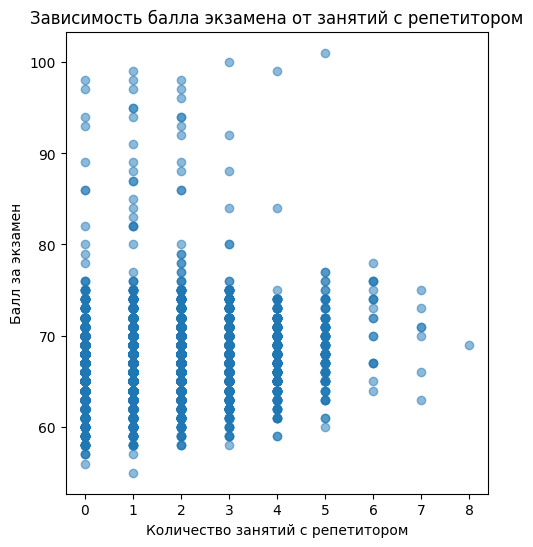

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Tutoring_Sessions'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Количество занятий с репетитором')
plt.ylabel('Балл за экзамен')
plt.title('Зависимость балла экзамена от занятий с репетитором')

correlation = df['Tutoring_Sessions'].corr(df['Exam_Score'])
print(f"Коэффициент корреляции: {correlation}")
if correlation > 0.3:
    print("Наблюдается умеренная положительная корреляция")
elif correlation > 0.1:
    print("Наблюдается слабая положительная корреляция")
else:
    print("Корреляция практически отсутствует")

6. Как физическая активность влияет на успеваемость?

Text(0.5, 1.0, 'Распределение баллов по физической активности')

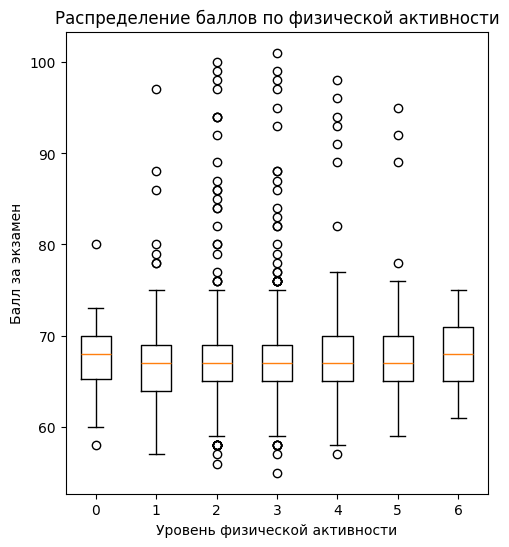

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
activity_groups = [df[df['Physical_Activity'] == level]['Exam_Score'] for level in sorted(df['Physical_Activity'].unique())]
plt.boxplot(activity_groups, tick_labels=sorted(df['Physical_Activity'].unique()))
plt.xlabel('Уровень физической активности')
plt.ylabel('Балл за экзамен')
plt.title('Распределение баллов по физической активности')


7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл

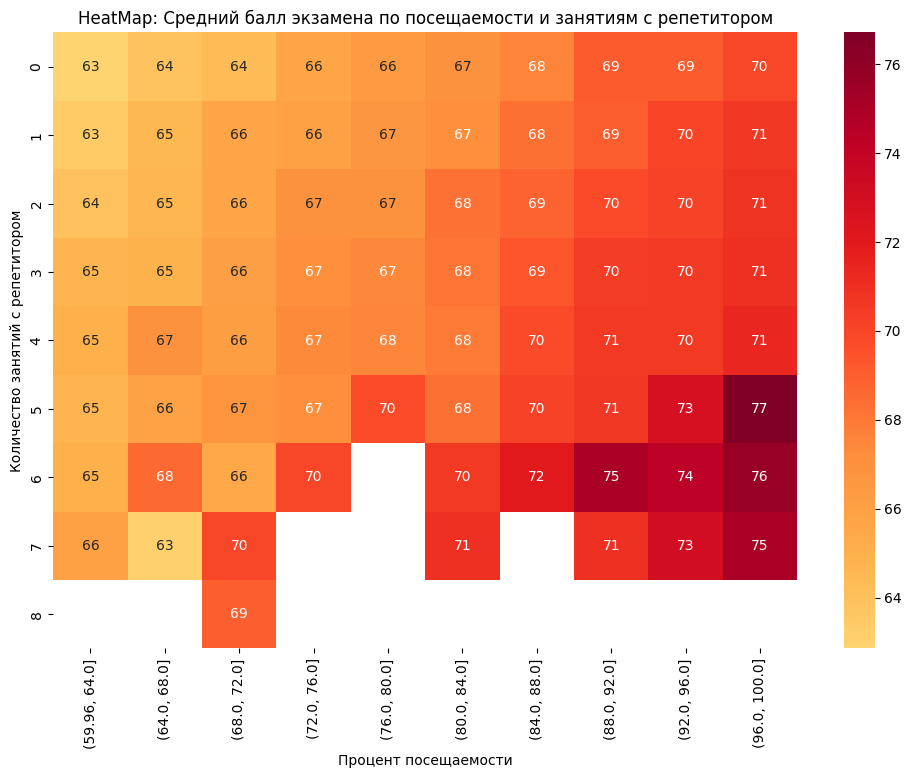

In [23]:
pivot_table = df.pivot_table(
    observed=True,
    values='Exam_Score', 
    index='Tutoring_Sessions', 
    columns=pd.cut(df['Attendance'], bins=10), 
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', center=df['Exam_Score'].mean())
plt.title('HeatMap: Средний балл экзамена по посещаемости и занятиям с репетитором')
plt.xlabel('Процент посещаемости')
plt.ylabel('Количество занятий с репетитором')
plt.show()
